<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Graduate_admission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #                Predict Graduate Admissions


**Probelm Statement** This dataset is created for prediction of Graduate Admissions from an Indian perspective.

**Our dataset has the following columns :**

>  **Serial No.** - Mentions the number of candidate for whom the details are listed.

>   **GRE Score** - GRE Score of the candidate, out of 340.

>   **TOEFL Score** - TOEFL Score of the candidate, out of 120.

>   **University Rating**- The rating of the university which the candidate has applied for, according to pre-applied parameters, out of 5.

>   **SOP**- A qualitative score of Statement of Purpose, out of 5.

>   **LOR**- A qualitative score of Letter of Recommendation, out of 5.

>   **CGPA**- Averaged CGPA of the candidate in his Under-Graduate period, out of 10.

>   **Research** - Whether the candidate has any research experience while doing UG, 0 or 1.

>   **Chance of Admit** - The chance of admit of the candidate, based on all other factors, expressed as a floating point number, on a range of 0 to 1.
It is our target feature which we want to predict.



---



In [ ]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

print(df.shape)

df[:5]

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop('Serial No.',axis=1,inplace=True)

In [ ]:
# Column names are not in proper manner some of them have spaces at end.

df.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit']

# So renaming columns....

In [ ]:
df[:3]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
df.shape

(500, 8)

In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df['University_Rating'].unique()

array([4, 3, 2, 5, 1])

In [ ]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

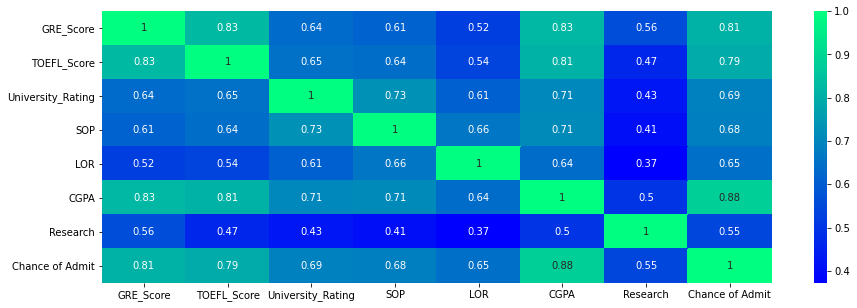

In [ ]:
plt.figure(figsize=(15,5))

sns.heatmap(df.corr(),annot=True,cmap='winter')

Heatmap shows Chance Of Admit is highly dependent on CGPA AND GRE SCORE

In [ ]:
df[df['Chance of Admit']>0.8].groupby('Chance of Admit').mean()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,
0.81,322.888889,109.777778,3.555556,3.500000,3.444444,8.813333,0.888889
0.82,320.888889,109.555556,3.666667,3.833333,4.055556,8.986667,0.777778
0.83,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091


In [ ]:
df.groupby(['University_Rating']).mean()


# Actually shows what are the average scores to get into Universities have rating from 1 to 5.


# For Example  5 star University admits students who had  
                    
#                        1)327 GRE                            3)SOP = 4.4 AND LOR = 4.4
                        
#                        2)113  TOEFL                         5)CGPA Min 9

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance of Admit
University_Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


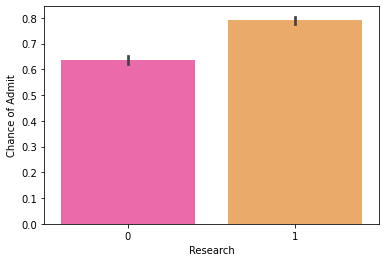

In [ ]:
sns.barplot(x=df['Research'],y=df['Chance of Admit'],palette='spring')


# Student who has Research experience has little edge than Others 

In [ ]:
df.loc[(df['Chance of Admit']>0.7) & (df['CGPA']<8)]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
483,304,103,5,5.0,3.0,7.92,0,0.71
484,317,106,3,3.5,3.0,7.89,1,0.73


1.   **By this we can say that chance of admit is very low if CGPA is less than 8.**
2.   **Because there are only 2 students  got admit whose CGPA < 8.**




In [ ]:
df.loc[(df['Chance of Admit']>0.7) & ((df['CGPA']>8) & (df['CGPA']<9))].shape[0]

143

**Chance of admit is high if CGPA has greater than 8**

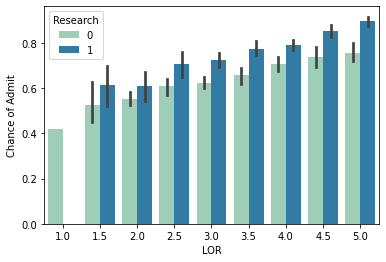

In [ ]:
sns.barplot(x=df['LOR'],y=df['Chance of Admit'],palette='YlGnBu',hue=df['Research'])


# If LOR is 4 and he has Research Experience then there is 80% Chance of Admit

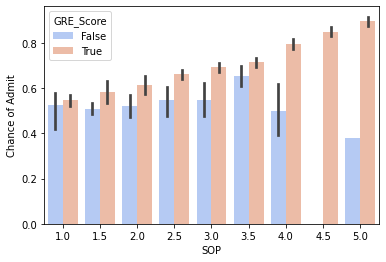

In [ ]:
sns.barplot(x=df['SOP'],y=df['Chance of Admit'],palette='coolwarm',hue=df['GRE_Score']>300)

In [ ]:
df[ ((df['LOR']<4.5) & (df['LOR']>=4))   & ((df['SOP']<4.5) & (df['SOP']>=4))  & ((df['GRE_Score']<320) & (df['GRE_Score']>=300))]['Chance of Admit'].mean()

0.7275

In [ ]:
X = df.drop(labels='Chance of Admit',axis=1) 

y = df['Chance of Admit']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [ ]:
sety_train = [1 if chance > 0.83 else 0 for chance in y_train]

sety_train=np.array(sety_train)

sety_test=[1 if chance > 0.83 else 0 for chance in y_test]
sety_test=np.array(sety_test)



# XGBoost

In [ ]:
from xgboost import XGBClassifier


from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = XGBClassifier()

clf.fit(X_train,sety_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(sety_test,clf_pred)

0.06666666666666667

In [ ]:
clf.score(X_test,sety_test)

0.9333333333333333

In [ ]:
params_grid  = {'learning_rate':[1e-10,1e-15,0.3,0.01,0.1,0.05,0.001],
                
                'n_estimators':[100,200,400,500,1000,1200],

                 'max_depth':[2,5,7,9,15,10,20,25,30]
                
                 
            
                }

In [ ]:
XGtuning = RandomizedSearchCV(estimator=clf,param_distributions=params_grid,cv=3,n_jobs=-1)

In [ ]:
XGtuning.fit(X_train,sety_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depreca

In [ ]:
XGtuning.best_params_

{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 400}

In [ ]:
XGtuning.best_score_

0.9542440318302386

In [ ]:
XGtune_pred = XGtuning.predict(X_test)


In [ ]:
XGtuning.score(X_test,sety_test)

0.9266666666666666

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train,sety_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_params  = {'criterion':['gini','impurity'],
                
                'n_estimators':[100,200,400,500,1000,1200],

                 'max_depth':[2,5,7,9,15,10,20,25,30],
                
                 'max_features':['auto','sqrt','log2']
                 
            
                }

In [ ]:

RFtuning = RandomizedSearchCV(estimator=rf_clf,param_distributions=rf_params,cv=3,n_jobs=-1)

In [ ]:
RFtuning.fit(X_train,sety_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
RFtuning.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
RFtuning.best_score_

0.9542440318302386

In [ ]:
RF_pred = RFtuning.predict(X_test)

In [ ]:
print(classification_report(sety_test,RF_pred))

confusion_matrix(sety_test,RF_pred)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       113
           1       0.91      0.81      0.86        37

    accuracy                           0.93       150
   macro avg       0.92      0.89      0.91       150
weighted avg       0.93      0.93      0.93       150



array([[110,   3],
       [  7,  30]])

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,sety_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_pred = LR.predict(X_test)

In [ ]:
accuracy_score(sety_test,LR_pred)

0.92

Text(0.5, 1.0, 'Heatmap of confusion matrix')

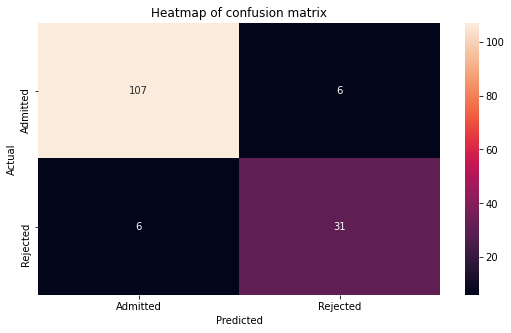

In [ ]:
matrix = confusion_matrix(sety_test,LR_pred)
plt.figure(figsize=(9,5))
sns.heatmap(matrix,annot=True,xticklabels=['Admitted', 'Rejected'],yticklabels=['Admitted','Rejected'],fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Heatmap of confusion matrix")

In [ ]:
LR.predict([[int(input()),118,4,4.5,4.5,9,0]])

330


array([1])

**1 in array tells that there is a chance of admit in university which has rating 4.**